In [3]:
from tensorflow import keras
(train_input, train_target), (test_input, test_target) = keras.datasets.fashion_mnist.load_data()

4422102/4422102 [==============================] - 0s 0us/step


In [5]:
print(train_input.shape, train_target.shape)

(60000, 28, 28) (60000,)


In [6]:
train_target

array([9, 0, 0, ..., 3, 0, 5], dtype=uint8)

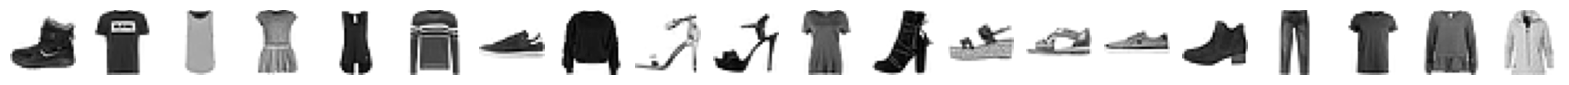

In [10]:
import matplotlib.pyplot as plt
fig, axs = plt.subplots(1, 20, figsize=(20, 20))
for i in range(20):
    axs[i].imshow(train_input[i], cmap='gray_r')
    axs[i].axis('off')
plt.show()

In [11]:
train_scaled = train_input / 255.0
train_scaled = train_scaled.reshape(-1, 28*28)

In [14]:
train_scaled.shape

(60000, 784)

In [15]:
from sklearn.model_selection import train_test_split
train_scaled, val_scaled, train_target, val_target = train_test_split(train_scaled, train_target, test_size=0.2, random_state=42)

In [16]:
train_scaled.shape, train_target.shape

((48000, 784), (48000,))

In [17]:
val_scaled.shape, val_target.shape

((12000, 784), (12000,))

In [19]:
from tensorflow import keras

In [29]:
dense = keras.layers.Dense(10, activation='softmax', input_shape=(784,))

In [30]:
model = keras.Sequential(dense)

In [31]:
model.compile(loss='sparse_categorical_crossentropy', metrics='accuracy')

In [27]:
train_scaled.shape

(48000, 784)

In [28]:
train_target.shape

(48000,)

In [34]:
model.fit(train_scaled, train_target, epochs=20)

Epoch 1/20
1500/1500 [==============================] - 1s 542us/step - loss: 0.4236 - accuracy: 0.8576
Epoch 2/20
1500/1500 [==============================] - 1s 545us/step - loss: 0.4191 - accuracy: 0.8587
Epoch 3/20
1500/1500 [==============================] - 1s 544us/step - loss: 0.4154 - accuracy: 0.8612
Epoch 4/20
1500/1500 [==============================] - 1s 537us/step - loss: 0.4127 - accuracy: 0.8605
Epoch 5/20
1500/1500 [==============================] - 1s 552us/step - loss: 0.4102 - accuracy: 0.8614
Epoch 6/20
1500/1500 [==============================] - 1s 535us/step - loss: 0.4077 - accuracy: 0.8632
Epoch 7/20
1500/1500 [==============================] - 1s 546us/step - loss: 0.4055 - accuracy: 0.8625
Epoch 8/20
1500/1500 [==============================] - 1s 535us/step - loss: 0.4046 - accuracy: 0.8636
Epoch 9/20
1500/1500 [==============================] - 1s 545us/step - loss: 0.4015 - accuracy: 0.8643
Epoch 10/20
1500/1500 [==============================] - 1s 546u

In [35]:
model.evaluate(val_scaled, val_target)

375/375 [==============================] - 0s 536us/step - loss: 0.4421 - accuracy: 0.8550


[0.4421236515045166, 0.8550000190734863]

In [36]:
dense1 = keras.layers.Dense(100, activation='sigmoid', input_shape=(784,))
dense2 = keras.layers.Dense(10, activation='softmax')

In [38]:
model = keras.Sequential([dense1, dense2])

In [39]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_3 (Dense)             (None, 100)               78500     
                                                                 
 dense_4 (Dense)             (None, 10)                1010      
                                                                 
Total params: 79510 (310.59 KB)
Trainable params: 79510 (310.59 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [46]:
model = keras.Sequential([
    keras.layers.Dense(100, activation='sigmoid', input_shape=(784,), name='hidden'),
    keras.layers.Dense(10, activation='softmax', name='output')],
    )

In [44]:
model.summary()

Model: "패션 MNIST 모델"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 hidden (Dense)              (None, 100)               78500     
                                                                 
 output (Dense)              (None, 10)                1010      
                                                                 
Total params: 79510 (310.59 KB)
Trainable params: 79510 (310.59 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [47]:
model.compile(loss='sparse_categorical_crossentropy', metrics='accuracy')
model.fit(train_scaled, train_target, epochs=5)

Epoch 1/5
1500/1500 [==============================] - 1s 798us/step - loss: 0.5732 - accuracy: 0.8045
Epoch 2/5
1500/1500 [==============================] - 1s 786us/step - loss: 0.4120 - accuracy: 0.8528
Epoch 3/5
1500/1500 [==============================] - 1s 770us/step - loss: 0.3770 - accuracy: 0.8630
Epoch 4/5
1500/1500 [==============================] - 1s 785us/step - loss: 0.3550 - accuracy: 0.8719
Epoch 5/5
1500/1500 [==============================] - 1s 772us/step - loss: 0.3378 - accuracy: 0.8779
